In [1]:
import sqlite3
import pandas as pd
import time
from IPython.core.display import clear_output

In [2]:
DB = "gpudata.db"

def run_query(q):
    with sqlite3.connect(DB) as conn:
        return pd.read_sql(q,conn)

def run_command(c):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c)
        
def run_inserts(c, values):
    with sqlite3.connect(DB) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None
        conn.execute(c, values) 
        
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

In [34]:
#Create the chipsets table
c0 = """
CREATE TABLE chipsets(
    chipset_id INTEGER PRIMARY KEY AUTOINCREMENT,
    chipset_name TEXT
); 
"""

run_command(c0)

In [47]:
#Create the card_specs table
c1 = """
CREATE TABLE 5(
    card_id TEXT PRIMARY KEY,
    card_name TEXT,
    series TEXT,
    chipset_id INTEGER,
    memory_in_GB FLOAT,
    core_clock_in_GHz FLOAT,
    ratings INTEGER,
    manufacturer TEXT,
    part_number TEXT,
    interface TEXT,
    memory_type TEXT,
    tdp_in_watts INTEGER,
    fan TEXT,
    sli_support TEXT,
    crossfire_support TEXT,
    hdmi INTEGER DEFAULT 0,
    FOREIGN KEY(chipset_id) REFERENCES chipsets(chipset_id)
); 
"""

run_command(c1)

In [48]:
#Create the card_prices table
c2 = """
CREATE TABLE card_prices(
    card_id TEXT,
    merchant_id INTEGER,    
    datetime FLOAT,
    price FLOAT,
    PRIMARY KEY(card_id, merchant_id, datetime)
    FOREIGN KEY(card_id) REFERENCES card_specs(card_id)
    FOREIGN KEY(merchant_id) REFERENCES merchants(merchant_id)
); 
"""

run_command(c2)

In [6]:
#Create the merchants table
c3 = """
CREATE TABLE merchants(
    merchant_id INTEGER PRIMARY KEY AUTOINCREMENT,
    merchant_name TEXT
); 
"""

run_command(c3)

In [21]:
#Create the benchmarks table
c4 = """
CREATE TABLE benchmarks(
    chipset_id INTEGER PRIMARY KEY,
    passmark_g3d INTEGER,
    passmark_direct_compute INTEGER,
    FOREIGN KEY(chipset_id) REFERENCES chipsets(chipset_id)
); 
"""

run_command(c4)

In [104]:
show_tables()

,name,type
0,sqlite_sequence,table
1,merchants,table
2,chipsets,table
3,card_specs,table
4,card_prices,table
5,benchmarks,table


In [20]:
#Uncomment the lines to remove the table(s).
#run_command('''DROP table chipsets''')
#run_command('''DROP TABLE card_specs;''')
#run_command('''DROP TABLE card_prices;''')
#run_command('''DROP TABLE merchants;''')
#run_command('''DROP TABLE benchmarks;''')

In [8]:
q0 = 'SELECT * FROM chipsets'
chipsets = run_query(q0)
print(len(chipsets))
chipsets.head()

150


,chipset_id,chipset_name
0,1,GeForce GTX 1060
1,2,GeForce GTX 1080 Ti
2,3,GeForce GTX 1050 Ti
3,4,GeForce GTX 1070 Ti
4,5,GeForce GTX 1080


In [10]:
chipsets['chipset_name'].values

array(['GeForce GTX 1060', 'GeForce GTX 1080 Ti', 'GeForce GTX 1050 Ti',
       'GeForce GTX 1070 Ti', 'GeForce GTX 1080', 'GeForce GTX 1070',
       'Radeon RX 580', 'GeForce GTX 1050', 'Radeon RX 560 - 1024',
       'Quadro GP100', 'GeForce GT 1030', 'Titan Xp', 'Titan V',
       'Radeon RX VEGA 64', 'Radeon RX 570', 'Radeon HD 4350',
       'GeForce GT 710', 'GeForce GTX 970', 'Quadro P6000',
       'Radeon RX VEGA 56', 'Radeon RX 560 - 896', 'Radeon HD 6450',
       'Quadro P4000', 'Radeon RX 550 - 512', 'Vega Frontier Edition',
       'GeForce GT 730', 'Quadro M6000', 'FirePro W9100',
       'Radeon Pro WX 5100', 'Radeon R9 390', 'GeForce GTX 950',
       'GeForce GTX 750 Ti', 'Quadro P2000', 'Radeon RX 550 - 640',
       'Radeon R5 230', 'Radeon Pro WX 4100', 'Radeon R9 380',
       'Quadro P5000', 'Radeon Pro WX 7100', 'Radeon R9 270X',
       'GeForce GTX 980', 'Quadro P1000', 'GeForce GTX 960',
       'FirePro V5800', 'Radeon HD 5450', 'Radeon Pro Duo Polaris',
       'Radeon 

In [103]:
q1 = 'SELECT * FROM card_specs'
specs = run_query(q1)
print(len(specs))
#specs.dropna()
specs[chipset_id == ]

518


,card_id,card_name,series,chipset_id,memory_in_GB,core_clock_in_GHz,ratings,manufacturer,part_number,interface,memory_type,tdp_in_watts,fan,sli_support,crossfire_support,hdmi
0,jZJkcf,Asus DUAL-GTX1060-O6G,Dual,1,6.000,1.590,45,Asus,DUAL-GTX1060-O6G,PCI-Express x16,GDDR5,120,Yes,No,No,2
1,Z8cMnQ,Asus STRIX-GTX1080TI-O11G-GAMING,STRIX GAMING OC,2,11.000,1.570,45,Asus,STRIX-GTX1080TI-O11G-GAMING,PCI-Express x16,GDDR5X,250,Yes,Yes,No,2
2,ZWnG3C,MSI GTX 1070 TI GAMING 8G,,4,8.000,1.610,2,MSI,GTX 1070 TI GAMING 8G,PCI-Express x16,GDDR5,180,Yes,Yes,No,1
3,ttQRsY,MSI GTX 1050 Ti 4G OC,,3,4.000,1.340,9,MSI,GTX 1050 Ti 4G OC,PCI-Express x16,GDDR5,75,Yes,No,No,1
4,bNcMnQ,EVGA 08G-P4-6286,FTW Gaming ACX 3.0,5,8.000,1.720,49,EVGA,08G-P4-6286,PCI-Express x16,GDDR5X,215,Yes,Yes,No,1
5,Cm38TW,EVGA 04G-P4-6253-KR,SC GAMING ACX 2.0,3,4.000,1.350,40,EVGA,04G-P4-6253-KR,PCI-Express x16,GDDR5,75,Yes,No,No,1
6,TrGj4D,MSI GeForce GTX 1060 6GT OCV1,GT OCV1,1,6.000,1.540,8,MSI,GeForce GTX 1060 6GT OCV1,PCI-Express x16,GDDR5,120,Yes,No,No,1
7,62KhP6,Asus ROG-STRIX-GTX1070TI-A8G-GAMING,ROG STRIX,4,8.000,1.610,6,Asus,ROG-STRIX-GTX1070TI-A8G-GAMING,PCI-Express x16,GDDR5,180,Yes,Yes,No,2
8,wrmxFT,EVGA 04G-P4-6251-KR,ACX 2.0,3,4.000,1.290,12,EVGA,04G-P4-6251-KR,PCI-Express x16,GDDR5,75,Yes,No,No,1
9,xH448d,MSI RX 580 ARMOR MK2 8G OC,ARMOR MK2 OC,7,8.000,1.340,1,MSI,RX 580 ARMOR MK2 8G OC,PCI-Express x16,GDDR5,185,Yes,No,4-way CrossFire,2


In [9]:
q2 = 'SELECT * FROM card_prices'
prices = run_query(q2)
print(len(prices))
prices.head()


5228


,card_id,merchant_id,datetime,price
0,24X2FT,1,1.505256e+09,183.53
1,24X2FT,1,1.509554e+09,161.69
2,24X2FT,1,1.509658e+09,159.85
3,24X2FT,1,1.510179e+09,170.04
4,24X2FT,1,1.510354e+09,159.85


In [10]:
prices['datetime'] = prices['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
prices.head()

,card_id,merchant_id,datetime,price
0,24X2FT,1,2017-09-12,183.53
1,24X2FT,1,2017-11-01,161.69
2,24X2FT,1,2017-11-02,159.85
3,24X2FT,1,2017-11-08,170.04
4,24X2FT,1,2017-11-10,159.85


In [11]:
q3 = 'SELECT * FROM merchants'
merchants = run_query(q3)
merchants

,merchant_id,merchant_name
0,1,Newegg Marketplace
1,2,Newegg Business
2,3,Newegg
3,4,B&H
4,5,PCM
5,6,Walmart
6,7,SuperBiiz
7,8,Dell
8,9,OutletPC
9,10,Monoprice


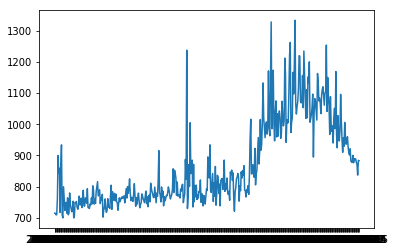

In [23]:
q_test = '''
SELECT 
    s.chipset_id,
    c.chipset_name,
    p.datetime,
    p.price
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
'''

test_table = run_query(q_test)
test_table['datetime'] = test_table['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
ten_eigties = test_table[test_table['chipset_name'] == 'GeForce GTX 1080 Ti']
grouped = ten_eigties.groupby(['datetime'])['price'].mean()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(grouped.index, grouped.values)

In [16]:
q_test = '''
SELECT 
    s.chipset_id,
    c.chipset_name,
    p.datetime,
    p.price
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
'''

test_table = run_query(q_test)
test_table['datetime'] = test_table['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 
result = test_table[test_table['chipset_name'] == 'Titan Xp']

print(result)

Empty DataFrame
Columns: [chipset_id, chipset_name, datetime, price]
Index: []


In [22]:
q3 = 'SELECT c.chipset_id, c.chipset_name, b.passmark_g3d, b.passmark_direct_compute FROM benchmarks b INNER JOIN chipsets c ON c.chipset_id = b.chipset_id'
benchmarks = run_query(q3)
benchmarks.sort_values('passmark_g3d', ascending=False)

,chipset_id,chipset_name,passmark_g3d,passmark_direct_compute
11,12,Titan Xp,14305,9302
12,13,Titan V,14166,8801
1,2,GeForce GTX 1080 Ti,14028,9417
17,19,Quadro P6000,13657,8536
4,5,GeForce GTX 1080,12282,7966
3,4,GeForce GTX 1070 Ti,12222,7443
9,10,Quadro GP100,11871,7109
13,14,Radeon RX VEGA 64,11632,7017
23,25,Vega Frontier Edition,11457,6921
54,58,GeForce GTX 980 Ti,11341,6402


In [29]:
chipsets_query = '''
SELECT 
    s.chipset_id,
    c.chipset_name
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
'''
chipsets_with_price = run_query(chipsets_query).drop_duplicates()

,chipset_id,chipset_name
1502,1,GeForce GTX 1060
469,2,GeForce GTX 1080 Ti
6764,3,GeForce GTX 1050 Ti
2729,4,GeForce GTX 1070 Ti
2279,5,GeForce GTX 1080
2723,6,GeForce GTX 1070
6386,7,Radeon RX 580
1999,8,GeForce GTX 1050
26969,9,Radeon RX 560 - 1024
56554,10,Quadro GP100


In [30]:
prices_query = '''
SELECT 
    s.chipset_id,
    c.chipset_name,
    p.datetime,
	p.merchant_id,
	m.merchant_name,
    p.price
FROM card_specs s
INNER JOIN card_prices p ON s.card_id = p.card_id
INNER JOIN chipsets c ON c.chipset_id = s.chipset_id
INNER JOIN merchants m ON p.merchant_id = m.merchant_id
'''
prices = run_query(prices_query)
prices['datetime'] = prices['datetime'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x))) 

In [31]:
prices

,chipset_id,chipset_name,datetime,merchant_id,merchant_name,price
0,47,Radeon Pro WX 3100,2017-09-12,1,Newegg Marketplace,183.53
1,47,Radeon Pro WX 3100,2017-11-01,1,Newegg Marketplace,161.69
2,47,Radeon Pro WX 3100,2017-11-02,1,Newegg Marketplace,159.85
3,47,Radeon Pro WX 3100,2017-11-08,1,Newegg Marketplace,170.04
4,47,Radeon Pro WX 3100,2017-11-10,1,Newegg Marketplace,159.85
5,47,Radeon Pro WX 3100,2017-11-12,1,Newegg Marketplace,159.10
6,47,Radeon Pro WX 3100,2017-12-05,1,Newegg Marketplace,152.99
7,47,Radeon Pro WX 3100,2017-12-13,1,Newegg Marketplace,160.11
8,47,Radeon Pro WX 3100,2017-12-14,1,Newegg Marketplace,160.11
9,47,Radeon Pro WX 3100,2017-12-15,1,Newegg Marketplace,160.11


In [44]:
prices['merchant_id'].isin([1,2])

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
95391    False
95392    False
95393    False
95394    False
95395    False
95396    False
95397    False
95398    False
95399    False
95400    False
95401    False
95402    False
95403    False
95404    False
95405    False
95406    False
95407    False
95408    False
95409    False
95410    False
95411    False
95412    False
95413    False
95414    False
95415    False
95416    False
95417    False
95418    False
95419    False
95420    False
Name: merchant_id, Length: 95421, dtype: bool

In [46]:
merchants = run_query('SELECT * FROM merchants')
values=[i+1 for i in range(len(merchants))]

In [48]:
prices[prices['chipset_id'] == 2 & (prices['merchant_id'].isin(values))]

,chipset_id,chipset_name,datetime,merchant_id,merchant_name,price
